In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

import seaborn as sns
import pandas as pd
import plotly.express as px
import scipy.stats as stats
import numpy as np

sns.set_theme(style="whitegrid")
sns.set_context('paper')

pd.set_option('display.max_rows', 500)

In [3]:
# timestamp,program,flag,return_code,execution_time,pkg_energy,dram_energy,user_time,sys_time,total_time,cpu_percent,avg_text,avg_data,peak_rss,inputs,outputs,minor_pagefaults,major_pagefaults,swaps,alloc_mem,reclaimed_mem,rts_mem,total_gcs,minor_gcs,major_gcs,avg_mem,max_mem,n_samples,init_cpu,init_sys,mut_cpu,mut_sys,total_gc_cpu,total_gc_sys,minor_gc_cpu,minor_gc_sys,major_gc_cpu,major_gc_sys,balance
data_files_45 = [
    '../data/results_45_1.csv',
    '../data/results_45_2.csv'
]

df_45 = pd.concat(map(lambda file: pd.read_csv(file), data_files_45))
df_45['total_energy'] = df_45['pkg_energy'] + df_45['dram_energy']

data_files_65 = [
    '../data/results_65_1.csv',
    '../data/results_65_2.csv'
]

df_65 = pd.concat(map(lambda file: pd.read_csv(file), data_files_65))
df_65['total_energy'] = df_65['pkg_energy'] + df_65['dram_energy']

data_files_55 = [
    '../data/results_55_1.csv',
    '../data/results_55_2.csv'
]

df_55 = pd.concat(map(lambda file: pd.read_csv(file), data_files_55))
df_55['total_energy'] = df_55['pkg_energy'] + df_55['dram_energy']

# display(df.head(5))

progs = df_55['program'].unique()
print(f"Programs ({len(progs)}): {progs}")
flags = df_55['flag'].unique()
print(f"Flags ({len(flags)}): {flags}")

Programs (18): ['circsim' 'hash' 'bernouilli' 'integrate' 'coins' 'queens' 'anna' 'fluid'
 'fannkuch-redux' 'binary-trees' 'n-body' 'pidigits' 'reverse-complement'
 'spectral-norm' 'callback001' 'chan' 'power' 'treejoin']
Flags (27): ['-O2' '-fno-case-merge' '-fno-case-folding' '-fno-call-arity'
 '-fno-exitification' '-fno-cmm-elim-common-blocks' '-fno-cmm-sink'
 '-fno-block-layout-cfg' '-fno-cpr-anal' '-fno-cse' '-fno-stg-cse'
 '-fno-dmd-tx-dict-sel' '-fno-do-eta-reduction'
 '-fno-do-lambda-eta-expansion' '-fno-float-in' '-fno-full-laziness'
 '-fno-ignore-asserts' '-fno-loopification' '-fno-specialise'
 '-fno-solve-constant-dicts' '-fno-stg-lift-lams' '-fno-strictness'
 '-fno-unbox-small-strict-fields' '-fno-spec-constr' '-fno-liberate-case'
 '-funfolding-use-threshold=40' '-funfolding-use-threshold=160']


In [16]:
energy_45, time_45 = df_45['total_energy'].values, df_45['execution_time'].values
energy_55, time_55 = df_55['total_energy'].values, df_55['execution_time'].values
energy_65, time_65 = df_65['total_energy'].values, df_65['execution_time'].values

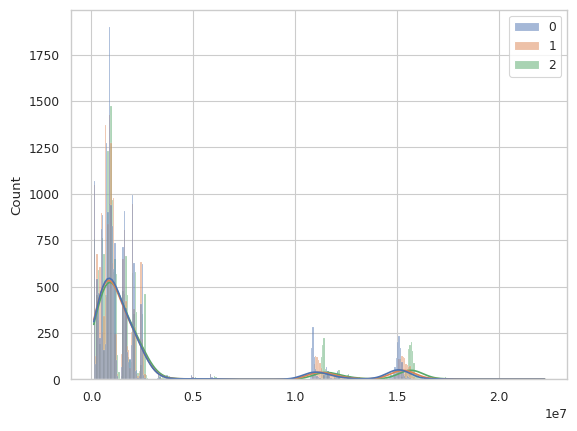

In [5]:
sns.histplot([df_45['total_energy'].values, df_55['total_energy'].values, df_65['total_energy'].values], kde=True)
plt.show()

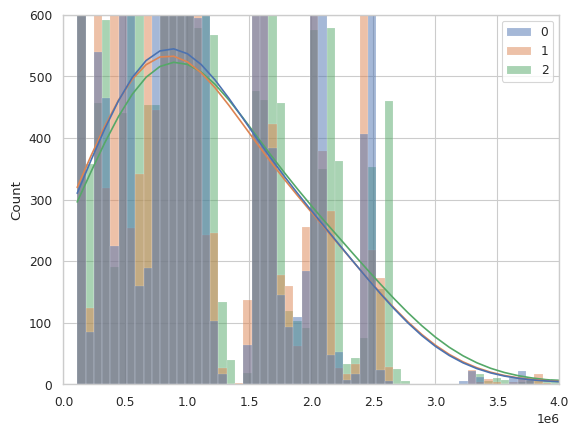

In [6]:
sns.histplot([df_45['total_energy'].values, df_55['total_energy'].values, df_65['total_energy'].values], kde=True)
plt.ylim(0, 600)
plt.xlim(0, 0.4e7)
plt.show()

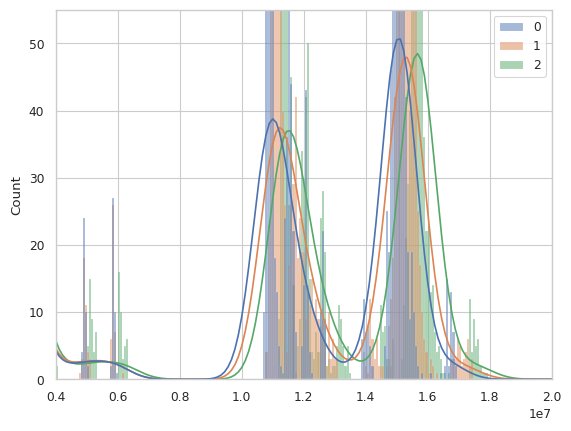

In [7]:
sns.histplot([df_45['total_energy'].values, df_55['total_energy'].values, df_65['total_energy'].values], kde=True)
plt.ylim(0, 55)
plt.xlim(0.4e7, 2.0e7)
plt.show()

In [8]:
print('                  avg           median')
print(f'Consumption 45ºC: {np.average(energy_45):.4f}  {np.median(energy_45):.4f}')
print(f'Consumption 55ºC: {np.average(energy_55):.4f}   {np.median(energy_55):.4f}')
print(f'Consumption 65ºC: {np.average(energy_65):.4f}  {np.median(energy_65):.4f}')

                  avg           median
Consumption 45ºC: 2485690.2816  1005308.0000
Consumption 55ºC: 2502110.9949   984983.0000
Consumption 65ºC: 2588643.3212  1045437.5000


### Conclusions
Programs started with a cpu temperature of 45ºC tend to consume more energy than those started with 55ºC, and less than those started with 65ºC. Thus indicating that, for the considered starting temperatures, 55ºC was the starting temperature at which programs tend to consume the least energy, and 65ºC the one at which programs tend to consume the most.

In [10]:
def mannwhitneyu(x, y, alt):
    Ux, p = stats.mannwhitneyu(x, y, alternative=alt)
    Uy = len(x) * len(y) - Ux
    
    return Ux, Uy, p

In [11]:
print(mannwhitneyu(energy_45, energy_55, alt='less'))
print(mannwhitneyu(energy_45, energy_55, alt='greater'))

(191184254.0, 186729346.0, 0.9779404218144866)
(191184254.0, 186729346.0, 0.022059625725210516)


In [12]:
print(mannwhitneyu(energy_45, energy_65, alt='less'))
print(mannwhitneyu(energy_45, energy_65, alt='greater'))

(180798127.0, 197115473.0, 8.340550867458334e-14)
(180798127.0, 197115473.0, 0.9999999999999166)


In [13]:
print(mannwhitneyu(energy_55, energy_65, alt='less'))
print(mannwhitneyu(energy_55, energy_65, alt='greater'))

(178881731.5, 199031868.5, 4.318585184195468e-20)
(178881731.5, 199031868.5, 1.0)
